# Exercise 3

#Q-1

$\text{Finding the minimizer of the function:} \\
\text{Here, $q(\mathbf{x})=512(x_2-x_1^2)^2+(4-x_1)^2$} \\
\text{Differentiating with respect to $x_1$ and equating to 0, we get..}\\
-2048(x_2-x_1^2)x_1-2(4-x_1)=0 \dots (1)\\
\text{Simillarly, differentiating with respect to $x_2$ and equating to 0, we get..} \\
1024(x_2-x_1^2)=0 \dots (2)\\
\Rightarrow x_2=x_1^2 \dots (3)\\
\text{Putting the value of $x_2$ in (1), we get..} \\
x_1=4 \\
\text{Putting the value of $x_1$ in (3), we get..}
x_2=16 \\
\text{Which gives  $q(\mathbf{x})=0$ which is the minimum value of $q(\mathbf{x})$. Hence, the minimizer value is: [4, 16]}
 $

# Q-2

$\text{Mathematically, the reason the Rosenbrock function is traditionally the test of choice is because of its scaling. The link in the question gives the standard Rosenbrock function, but I will use the more general version } $
$f(\mathbf{x_1, x_2})=512(x_2-x_1^2)^2+(4-x_1)^2 \\
\text{ Obviously the solution here is  $(x_1,x_2)=(a,a^2)$  with objective value  $f(x_1,x_2)=0$}$
$\text{From this formulation, for large values of  a , we can see that one variable is on a significantly different magnitude than the other.} \\ \text{ When applying steepest descent to this problem, the gradient is far more concerned with correcting the second variable than the first because it is simply much more “wrong”. This is precisely why we see the zig-zag approach mentioned in the previous answer.}$
$\text{A more mathematically precise argument is that the steepest descent algorithm depends on the condition number of the Hessian matrix of the objective function. For the standard Rosenbrock function, this is on the order of  104  if I remember correctly.}$
$\text{However, that is not to say that we cannot solve the Rosenbrock problem. By applying a linear transformation  T  such that  H(Tx)  has a better condition number, we can improve the convergence of the steepest descent algorithm. I believe it is highly nontrivial to find the best one, but it’s quite easy to find a  2×2  matrix that improves the condition number marginally}$

In [9]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np
#Henceforth, we can lazily use np to denote the much longer numpy !!
import matplotlib.pyplot as plt #package useful for plotting

In [10]:
# define fn to calculate objective value function
# N = 3 case
def evalf(x):
  assert type(x) is np.ndarray  # doen not accept invalid arguements
  return (512*((x[1]-x[0]**2)**2) + (4-x[0])**2)

In [11]:
# define function that returns gradient as numpy array
def evalg(x):
  assert type(x) is np.ndarray and len(x) == 2
  return np.array([-2048*(x[1]-x[0]**2)*x[0]-2*(4-x[0]), 1024*(x[1]-x[0]**2)])


In [12]:
def compute_steplength1(x,p, alpha_k):
  gamma = 0.5
  rho = 0.5
  while evalf(x - (alpha_k*p)) > (evalf(x) - (gamma*alpha_k*(np.linalg.multi_dot([p,p])))):
    alpha_k = rho*alpha_k
  return alpha_k

In [13]:
def find_minimizer1(start_x,tol, alpha_k):
  assert type(start_x) is np.ndarray and len(start_x) == 2
  assert type(tol) is float and tol >= 0
  x = start_x
  g_x = evalg(x)
  k = 0
  while (np.linalg.norm(g_x) > tol):
    step_length = compute_steplength1(x, g_x, alpha_k)
    x = np.subtract(x,np.multiply(step_length,g_x))
    k += 1
    g_x = evalg(x)
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x))
  return x,evalf(x), k

In [19]:
def compute_steplength2(x,p, rho):
  alpha_k=1
  gamma = 0.5
  while float(evalf(x - (alpha_k*p))) > float((float(evalf(x)) - (gamma*alpha_k*(np.linalg.multi_dot([p,p]))))):
    alpha_k = rho*alpha_k
  return alpha_k

In [25]:
def find_minimizer2(start_x,tol, rho):
  assert type(start_x) is np.ndarray and len(start_x) == 2
  assert type(tol) is float and tol >= 0
  x = start_x
  g_x = evalg(x)
  k = 0
  while (np.linalg.norm(g_x) > tol):
    step_length = compute_steplength2(x, g_x, rho)
    x = np.subtract(x,np.multiply(step_length,g_x))
    k += 1
    g_x = evalg(x)
    #print('iter:',k, ' x:', x, ' f(x):', float(evalf(x)), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, float(evalf(x)), k

#Q-5

In [16]:
# initialize the inputs
alpha_list=[1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
itr_list=[]
my_start_x = np.array([4, 4], dtype='double')
my_tolerance = 10**(-5)
for i in alpha_list:
    x_min, f_val, itr =find_minimizer1(my_start_x, my_tolerance, i)
    itr_list.append(itr)
    print(' Minimizer:', x_min, ' f(x):', f_val,'No. of iterations:',itr)

 Minimizer: [ 3.99995979 15.99967832]  f(x): 1.6168092258785912e-09 No. of iterations: 937301
 Minimizer: [ 3.99995989 15.9996791 ]  f(x): 1.6089707289734712e-09 No. of iterations: 2579228
 Minimizer: [ 3.99996173 15.99969379]  f(x): 1.4649937092562241e-09 No. of iterations: 7941373
 Minimizer: [ 3.99996036 15.99968288]  f(x): 1.5712871146715404e-09 No. of iterations: 3937558
 Minimizer: [ 3.99995979 15.99967832]  f(x): 1.6168092258785912e-09 No. of iterations: 937301
 Minimizer: [ 3.99996081 15.99968647]  f(x): 1.535925257924106e-09 No. of iterations: 6067322
 Minimizer: [ 3.99995977 15.99967814]  f(x): 1.6186136561974348e-09 No. of iterations: 937339
 Minimizer: [ 3.99996081 15.99968647]  f(x): 1.535925257924106e-09 No. of iterations: 6067322
 Minimizer: [ 3.99996079 15.99968629]  f(x): 1.5376452426838417e-09 No. of iterations: 5309493


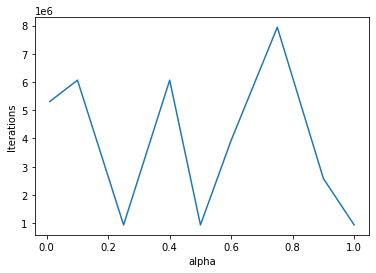

In [17]:
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(alpha_list,itr_list)
plt.xlabel('alpha')
plt.ylabel('Iterations')
plt.show()

$\text{No. of iterations is not monotonic as the value of alpha decreases and we obtained the minimum value for $\alpha$=0.75}$

# Q-6

In [26]:
rho_list=[0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
itr_list=[]
my_start_x = np.array([4, 4], dtype='double')
my_tolerance = 10**(-5)
for i in rho_list:
    x_min, f_val, itr =find_minimizer2(my_start_x, my_tolerance, i)
    itr_list.append(itr)
    print(' Minimizer:', x_min, ' f(x):', f_val,'No. of iterations:',itr)

 Minimizer: [ 3.99995994 15.9996795 ]  f(x): 1.6049442235872185e-09 No. of iterations: 1671540
 Minimizer: [ 3.99996092 15.99968734]  f(x): 1.5274068560897833e-09 No. of iterations: 3707435
 Minimizer: [ 3.99996039 15.99968312]  f(x): 1.568961695756106e-09 No. of iterations: 4416822
 Minimizer: [ 3.99995979 15.99967832]  f(x): 1.6168092258785912e-09 No. of iterations: 937301
 Minimizer: [ 3.99996027 15.99968219]  f(x): 1.5781734371386916e-09 No. of iterations: 3037943
 Minimizer: [ 3.99995989 15.9996791 ]  f(x): 1.6090036275565417e-09 No. of iterations: 921362
 Minimizer: [ 3.99996009 15.99968072]  f(x): 1.592799819562446e-09 No. of iterations: 7341010
 Minimizer: [ 3.99996248 15.99969985]  f(x): 1.407606621418479e-09 No. of iterations: 68205871


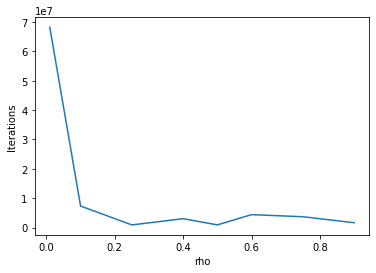

In [27]:
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(rho_list,itr_list)
plt.xlabel('rho')
plt.ylabel('Iterations')
plt.show()

$\text{The no. of iteration increased exponentially as the value of $\rho$ change from 0.1 to 0.01 and we obtain the minimum functional value at $\rho$=0.01}$